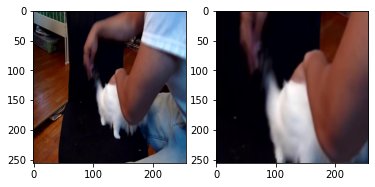

In [14]:
import os.path as osp
import glob
import _init_paths
from PIL import Image
import numpy as np
import cv2
import random

import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import torch.nn.functional as F
from torchvision import transforms
from dall_e  import map_pixels, unmap_pixels, load_model
from IPython.display import display, display_markdown
from vcl.models.vqvae import *
from vcl.utils import *
from mmcv.runner import get_dist_info, init_dist, load_checkpoint

import matplotlib.pyplot as plt
%matplotlib inline

target_image_size = 256

samples = []
with open('/home/lr/dataset/YouTube-VOS/2018/train/test_records.txt', 'r') as f:
    for line in f.readlines():
        name, frame_idx, pixel_idx = line.strip('\n').split()
        samples.append([name, int(frame_idx), int(pixel_idx)])

# sample_video_idx = 92
sample_video_idx = random.randint(0, 300)
sample = {}
sample['frames_path'] = sorted(glob.glob(osp.join('/home/lr/dataset/YouTube-VOS/2018/train/JPEGImages', samples[sample_video_idx][0], '*.jpg')))


frame_idx = samples[sample_video_idx][1]
sample_idx = samples[sample_video_idx][2]
video_name = sample['frames_path'][0].split('/')[-2]

frame1 = cv2.imread(sample['frames_path'][frame_idx])[:,:,::-1]
frame1 = cv2.resize(frame1, (256,256))
x1 = transforms.ToTensor()(Image.open(sample['frames_path'][frame_idx]).resize((256,256))).unsqueeze(0)

theta = torch.tensor([
    [0.5, 0  , 0.0],
    [0  , 0.5, 0.0]
], dtype=torch.float)

grid = F.affine_grid(theta.unsqueeze(0), x1.size())
output = F.grid_sample(x1, grid)
new_img_torch = output[0]

plt.figure()
plt.subplot(1,2,1), plt.imshow(x1[0].numpy().transpose(1,2,0))
plt.subplot(1,2,2), plt.imshow(new_img_torch.numpy().transpose(1,2,0))
plt.imshow(new_img_torch.numpy().transpose(1,2,0))
plt.show()